In [8]:
import atoti as tt
session = tt.Session()

Closing existing "Unnamed" session to create the new one.


In [9]:
sales_table = session.read_csv("sales.csv", keys=["Sale ID"])

cube = session.create_cube(sales_table)

In [10]:
h = cube.hierarchies
h

{('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x000001BB828BD910>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB828BE550>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x000001BB82160710>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x000001BB828B16D0>}

In [11]:
l = cube.levels
l

In [12]:
m = cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001BB828C46D0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001BB828C4710>, 'Unit price.MEAN': <atoti.measure.Measure object at 0x000001BB828C45D0>, 'Unit price.SUM': <atoti.measure.Measure object at 0x000001BB828C4690>, 'Quantity.MEAN': <atoti.measure.Measure object at 0x000001BB828C7C90>, 'Quantity.SUM': <atoti.measure.Measure object at 0x000001BB828C7CD0>}

In [13]:
cube.query(m["Quantity.SUM"])

,Quantity.SUM
0,"8,077.00"


In [14]:
cube.query(m["Quantity.SUM"], levels=[l["Shop"]])

,Quantity.SUM
Shop,
shop_0,202.00
shop_1,202.00
shop_10,203.00
shop_11,203.00
shop_12,201.00
shop_13,202.00
shop_14,202.00
shop_15,202.00
shop_16,201.00


In [15]:
cube.query(
    m["Quantity.SUM"],
    filter=l["Shop"] == "shop_0",
)

,Quantity.SUM
0,202.00


In [16]:
cube.query(m["Quantity.SUM"], levels=[l["Date"], l["Product"]])

Quantity.SUM
Date       Product             
2021-01-06 BED_24          8.00
           BED_25          4.00
           BED_26          6.00
           BED_27          4.00
           BED_3           2.00
...                         ...
2021-02-04 TSH_52          6.00
           TSH_53          4.00
           TSH_7           3.00
           TSH_8           5.00
           TSH_9           3.00

[1830 rows x 1 columns]

In [17]:
cube.query(
    m["Quantity.SUM"],
    levels=[l["Date"], l["Product"]],
    filter=l["Shop"] == "shop_0",
)

Quantity.SUM
Date       Product             
2021-01-15 BED_24          1.00
           BED_26          1.00
           BED_3           1.00
           BED_4           1.00
           BED_46          1.00
...                         ...
2021-02-04 TSH_51          2.00
           TSH_52          1.00
           TSH_53          1.00
           TSH_7           1.00
           TSH_9           1.00

[125 rows x 1 columns]

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
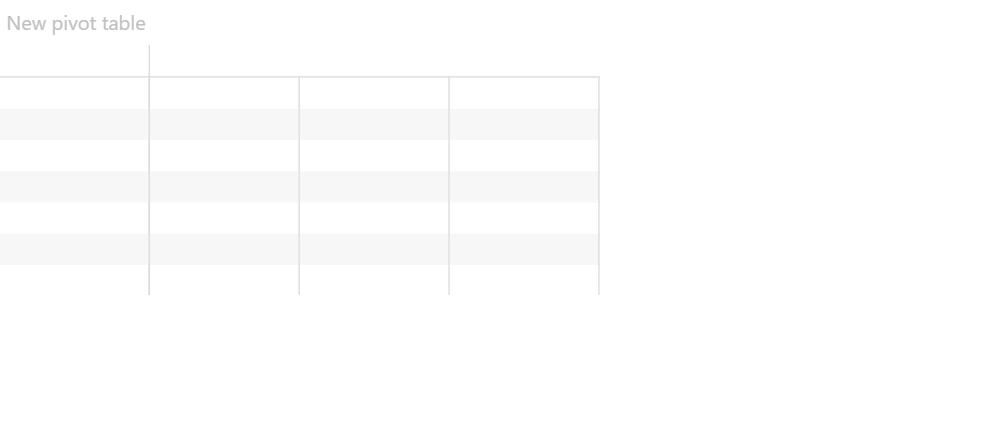

In [18]:
session.widget

In [19]:
products_table = session.read_csv("products.csv", keys=["Product"])

In [20]:
products_table.head()

,Category,Sub category,Size,Purchase price,Color,Brand
Product,,,,,,
BED_6,Furniture,Bed,King,375.0,white,Basic
HOO_14,Cloth,Hoodie,L,39.0,brown,Over
TAB_22,Furniture,Table,2m40,280.0,blue,Basic
TSH_30,Cloth,T-shirt,M,19.0,black,Over
SHO_38,Cloth,Shoes,9,44.0,red,Over


In [21]:
sales_table.join(products_table, sales_table["Product"] == products_table["Product"])

In [22]:
session.tables.schema

An error occurred while calling o551.generateSchemaGraph.
: guru.nidi.graphviz.engine.GraphvizException: None of the provided engines could be initialized.
	at guru.nidi.graphviz.engine.Graphviz.getEngine(Graphviz.java:162)
	at guru.nidi.graphviz.engine.Graphviz.doExecute(Graphviz.java:312)
	at guru.nidi.graphviz.engine.Graphviz.execute(Graphviz.java:292)
	at guru.nidi.graphviz.engine.Renderer.execute(Renderer.java:139)
	at guru.nidi.graphviz.engine.Renderer.toFile(Renderer.java:59)
	at com.activeviam.graphviz.DataStoreGraphBuilder.writeGraph(DataStoreGraphBuilder.java:110)
	at com.activeviam.graphviz.DataStoreGraphBuilder.buildDatastoreSchema(DataStoreGraphBuilder.java:105)
	at io.atoti.api.impl.OutsideTransactionDataApiImpl.generateSchemaGraph(OutsideTransactionDataApiImpl.java:185)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.Del

In [23]:
h

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x000001BBFF977D50>, ('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x000001BB82CA5AD0>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C90210>, ('Products', 'Sub category'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8FE10>, ('Products', 'Category'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8FF90>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8FB10>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8F8D0>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8F450>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x000001BB82C8F5D0>}

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
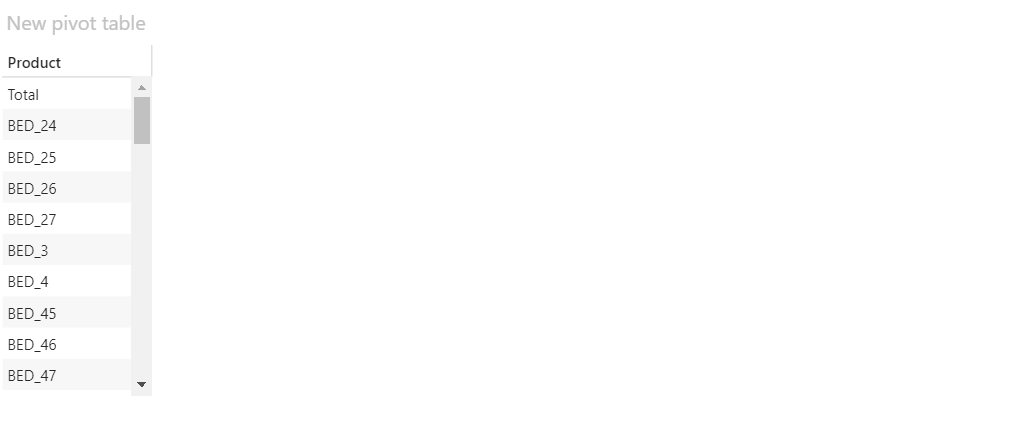

In [26]:
session.widget

In [27]:
m["Purchase price.VALUE"] = tt.agg.single_value(products_table["Purchase price"])

In [28]:
cube.query(m["Purchase price.VALUE"], levels=[l["Product"]])

,Purchase price.VALUE
Product,
BED_24,127.00
BED_25,252.00
BED_26,333.00
BED_27,375.00
BED_3,127.00
...,...
TSH_52,20.00
TSH_53,21.00
TSH_7,17.00


In [30]:
shops_table = session.read_csv("shops.csv", keys=["Shop ID"])
shops_table.head()

,City,State or region,Country,Shop size
Shop ID,,,,
shop_6,San Antonio,Texas,USA,small
shop_14,Los Angeles,California,USA,small
shop_22,Marseille,Provence-Alpes-Côte d'Azur,France,small
shop_30,San Francisco,California,USA,medium
shop_38,Saint-Étienne,Auvergne-Rhône-Alpes,France,medium


In [31]:
sales_table.join(shops_table, sales_table["Shop"] == shops_table["Shop ID"])
session.tables.schema

ExpatError: no element found: line 1, column 0

In [32]:
m["Max price"] = tt.agg.max(sales_table["Unit price"])

In [33]:
cube.query(m["Max price"], include_totals=True, levels=[l["Category"]])

,Max price
Category,
Total,440.00
Cloth,60.00
Furniture,440.00


In [41]:
m["Amount.SUM"] = tt.agg.sum(sales_table["Quantity"] * sales_table["Unit price"])
m["Amount.MEAN"] = tt.agg.mean(
    sales_table["Quantity"] * sales_table["Unit price"],
)
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

In [36]:
cost = tt.agg.sum(
    m["Quantity.SUM"] * tt.agg.single_value(products_table["Purchase price"]),
    scope=tt.OriginScope(l["Product"]),
)

In [37]:
m["Margin"] = m["Amount.SUM"] - cost

In [38]:
m["Margin rate"] = m["Margin"] / m["Amount.SUM"]

In [39]:
cube.query(m["Margin"], m["Margin rate"], levels=[l["Product"]])

,Margin,Margin rate
Product,,
BED_24,"3,082.00",.15
BED_25,"6,336.00",.16
BED_26,"8,060.00",.16
BED_27,"8,580.00",.15
BED_3,"3,036.00",.15
...,...,...
TSH_52,520.00,.17
TSH_53,396.00,.12
TSH_7,393.00,.15


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
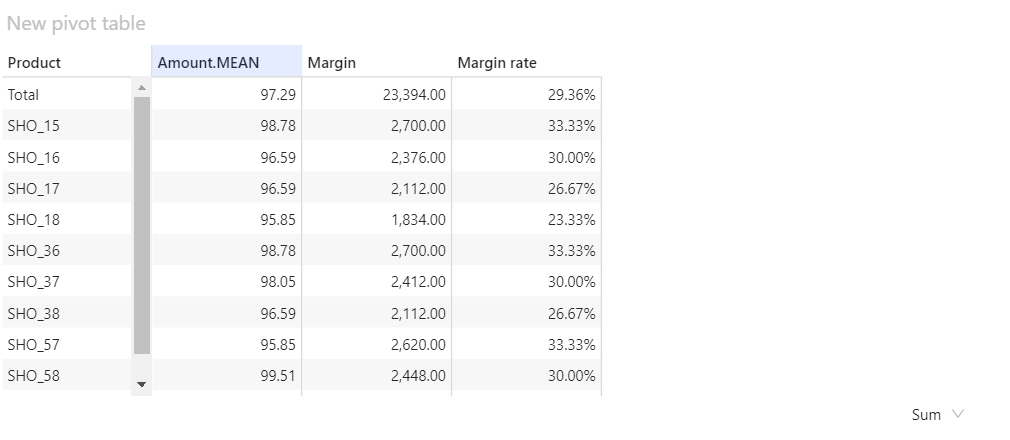

In [40]:
session.widget

In [42]:
m["Cumulative amount"] = tt.agg.sum(
    m["Amount.SUM"], scope=tt.CumulativeScope(level=l["Date"])
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
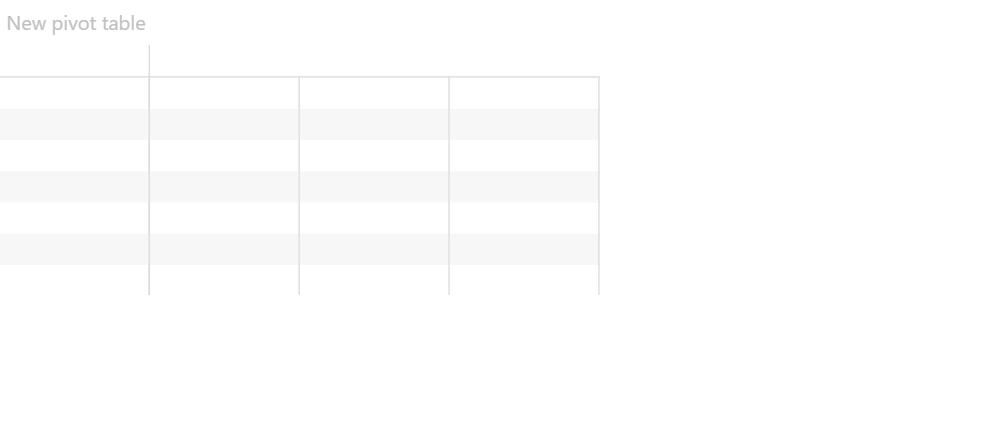

In [43]:

session.widget

In [44]:
m["Average amount per shop"] = tt.agg.mean(
    m["Amount.SUM"], scope=tt.OriginScope(l["Shop"])
)


In [45]:
cube.query(
    m["Average amount per shop"], include_totals=True, levels=[l["Sub category"]]
)

,Average amount per shop
Sub category,
Total,"24,036.58"
Bed,"12,728.88"
Chair,601.50
Hoodie,"1,403.20"
Shoes,"3,184.50"
T-shirt,"1,095.00"
Table,"5,023.50"


In [46]:
h["Product"] = [l["Category"], l["Sub category"], l["Product"]]

In [47]:
del h["Category"]
del h["Sub category"]

In [48]:
h

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x000001BB83A68DD0>, ('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x000001BB83A53550>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF3B90>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF3D10>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF3E90>, ('Shops', 'State or region'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF4050>, ('Shops', 'City'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF41D0>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF4350>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF44D0>, ('Shops', 'Country'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF47D0>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF4950>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AF4AD0>}

In [49]:
h["Geography"] = [
    shops_table["Country"],
    shops_table["State or region"],
    shops_table["City"],
]
del h["Country"]
del h["State or region"]
del h["City"]

In [50]:
h["Geography"].dimension = "Location"
h

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AA9D90>, ('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AAB810>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AAA210>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AA8A10>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AABBD0>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AAAD50>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AE8BD0>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AEBD50>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AEAB50>, ('Location', 'Geography'): <atoti.hierarchy.Hierarchy object at 0x000001BB83AE8E10>}

In [51]:
m["Parent category amount"] = tt.parent_value(
    m["Amount.SUM"], degrees={h[("Products", "Product")]: 1}
)

In [52]:
m["Percent of parent amount"] = m["Amount.SUM"] / m["Parent category amount"]

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
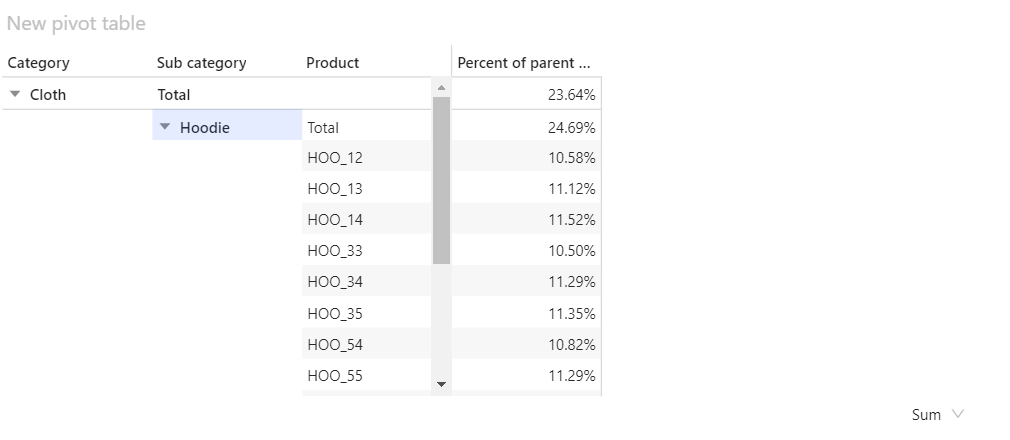

In [53]:
session.widget

In [54]:
del m["Unit price.SUM"]

In [55]:
m["Parent category amount"].visible = False

In [56]:
for measure in [
    m["Amount.MEAN"],
    m["Amount.SUM"],
    m["Average amount per shop"],
    m["Cumulative amount"],
    m["Percent of parent amount"],
]:
    measure.folder = "Amount"

In [57]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001BB83AE8810>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001BB83AE8E10>, 'Purchase price.VALUE': <atoti.measure.Measure object at 0x000001BB82C5D390>, 'Max price': <atoti.measure.Measure object at 0x000001BB83AEA050>, 'Amount.SUM': <atoti.measure.Measure object at 0x000001BB828BD290>, 'Amount.MEAN': <atoti.measure.Measure object at 0x000001BB828BDD50>, '__hidden_0_AGGREGATED': <atoti.measure.Measure object at 0x000001BB828BE110>, '__hidden_1_CALCULATED': <atoti.measure.Measure object at 0x000001BB828BCED0>, '__hidden_2_LEAF_AGGREGATION': <atoti.measure.Measure object at 0x000001BB83AF5350>, 'Margin': <atoti.measure.Measure object at 0x000001BB83AF4450>, 'Margin rate': <atoti.measure.Measure object at 0x000001BB83AF7A10>, '__hidden_3_CUMULATIVE_AGG_INNER': <atoti.measure.Measure object at 0x000001BB83AF7B10>, '__hidden_5_LEVEL': <atoti.measure.Measure object at 0x000001BB83AF4E10>, '__hidden_4_COMPARABLE_MAX': <atoti.measure.Measure object at 0x000001BB83AF7A90>, 'Cumulative amount': <atoti.measure.Measure object at 0x000001BB83AF4ED0>, 'Average amount per shop': <atoti.measure.Measure object at 0x000001BB83AF7FD0>, 'Parent category amount': <atoti.measure.Measure object at 0x000001BB83AF4610>, 'Percent of parent amount': <atoti.measure.Measure object at 0x000001BB83AF44D0>, 'Unit price.MEAN': <atoti.measure.Measure object at 0x000001BB83AF4B50>, 'Quantity.MEAN': <atoti.measure.Measure object at 0x000001BB83AF4410>, 'Quantity.SUM': <atoti.measure.Measure object at 0x000001BB83AF4810>}

In [58]:
cube.query(m["Percent of parent amount"], m["Margin rate"], levels=[l["Category"]])

,Percent of parent amount,Margin rate
Category,,
Cloth,.24,.23
Furniture,.76,.13


In [59]:
m["Percent of parent amount"].formatter = "DOUBLE[0.00%]"
m["Margin rate"].formatter = "DOUBLE[0.00%]"

In [60]:
cube.query(m["Percent of parent amount"], m["Margin rate"], levels=[l["Category"]])

,Percent of parent amount,Margin rate
Category,,
Cloth,23.64%,22.56%
Furniture,76.36%,13.49%


In [61]:
import pandas as pd


In [63]:
products_df = pd.read_csv("products.csv")
products_df.head()

,Product,Category,Sub category,Size,Purchase price,Color,Brand
0,TAB_0,Furniture,Table,1m80,190.0,black,Basic
1,TAB_1,Furniture,Table,2m40,280.0,white,Mega
2,CHA_2,Furniture,Chair,NaN,48.0,blue,Basic
3,BED_3,Furniture,Bed,Single,127.0,red,Mega
4,BED_4,Furniture,Bed,Double,252.0,brown,Basic


In [64]:
better_prices = {
    "TAB_0": 180.0,
    "TAB_1": 250.0,
    "CHA_2": 40.0,
    "BED_3": 110.0,
    "BED_4": 210.0,
}

In [65]:
for product, purchase_price in better_prices.items():
    products_df.loc[
        products_df["Product"] == product, "Purchase price"
    ] = purchase_price
products_df.head()

,Product,Category,Sub category,Size,Purchase price,Color,Brand
0,TAB_0,Furniture,Table,1m80,180.0,black,Basic
1,TAB_1,Furniture,Table,2m40,250.0,white,Mega
2,CHA_2,Furniture,Chair,NaN,40.0,blue,Basic
3,BED_3,Furniture,Bed,Single,110.0,red,Mega
4,BED_4,Furniture,Bed,Double,210.0,brown,Basic


In [66]:
products_table.scenarios["Cheaper purchase prices"].load_pandas(products_df)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
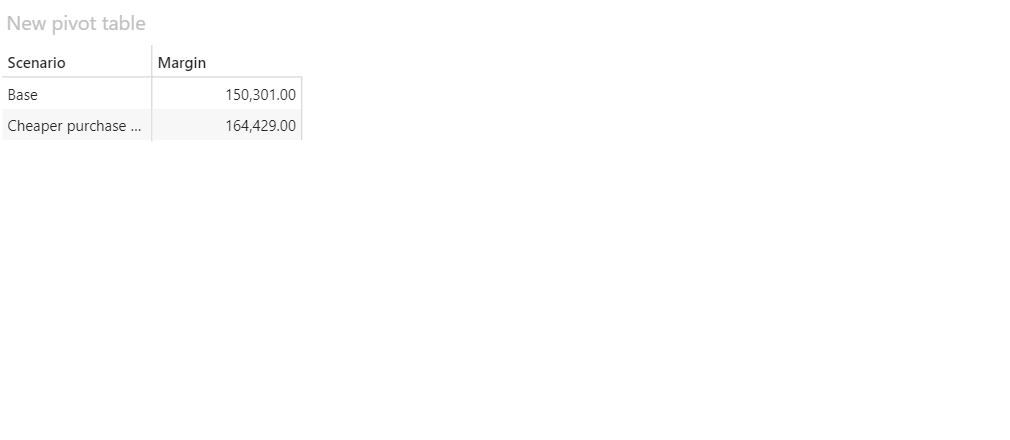

In [67]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
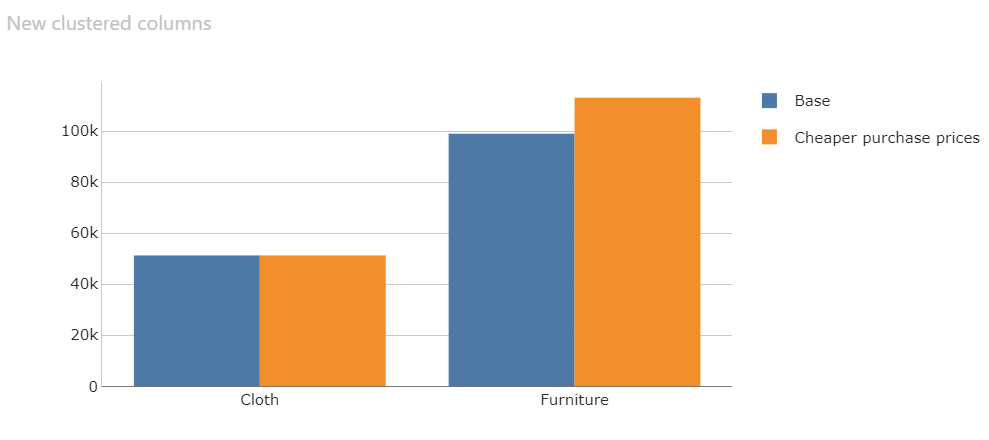

In [69]:
session.widget


In [70]:
country_simulation = cube.create_parameter_simulation(
    "Country Simulation",
    levels=[l["Country"]],
    measures={"Country parameter": 1.0},
)

In [71]:
country_simulation += ("France Crisis", "France", 0.80)
country_simulation.head()

,,Country parameter
Scenario,Country,
France Crisis,France,0.8


In [72]:
m["Quantity.SUM"] = tt.agg.sum(
    tt.agg.sum(sales_table["Quantity"]) * m["Country parameter"],
    scope=tt.OriginScope(l["Country"]),
)
m["Amount.SUM"] = tt.agg.sum(
    tt.agg.sum(sales_table["Unit price"] * sales_table["Quantity"])
    * m["Country parameter"],
    scope=tt.OriginScope(l["Country"]),
)

In [73]:
cube.query(
    m["Quantity.SUM"],
    m["Amount.SUM"],
    include_totals=True,
    levels=[l["Country Simulation"], l["Country"]],
)

Quantity.SUM  Amount.SUM
Country Simulation Country                         
Base                           8,077.00  961,463.00
                   France      3,027.00  358,042.00
                   USA         5,050.00  603,421.00
France Crisis                  7,471.60  889,854.60
                   France      2,421.60  286,433.60
                   USA         5,050.00  603,421.00

In [74]:
cube.query(m["Cumulative amount"], levels=[l["Country Simulation"], l["Country"]])

Cumulative amount
Country Simulation Country                  
Base               France         358,042.00
                   USA            603,421.00
France Crisis      France         286,433.60
                   USA            603,421.00

In [75]:
country_simulation += ("US boost", "USA", 1.15)

In [76]:
cube.query(m["Quantity.SUM"], levels=[l["Country Simulation"], l["Country"]])

Quantity.SUM
Country Simulation Country             
Base               France      3,027.00
                   USA         5,050.00
France Crisis      France      2,421.60
                   USA         5,050.00
US boost           France      3,027.00
                   USA         5,807.50

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
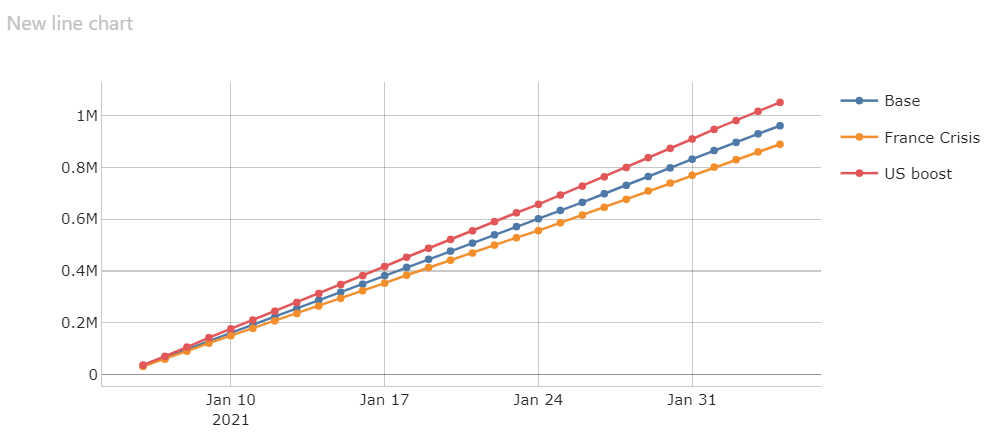

In [77]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
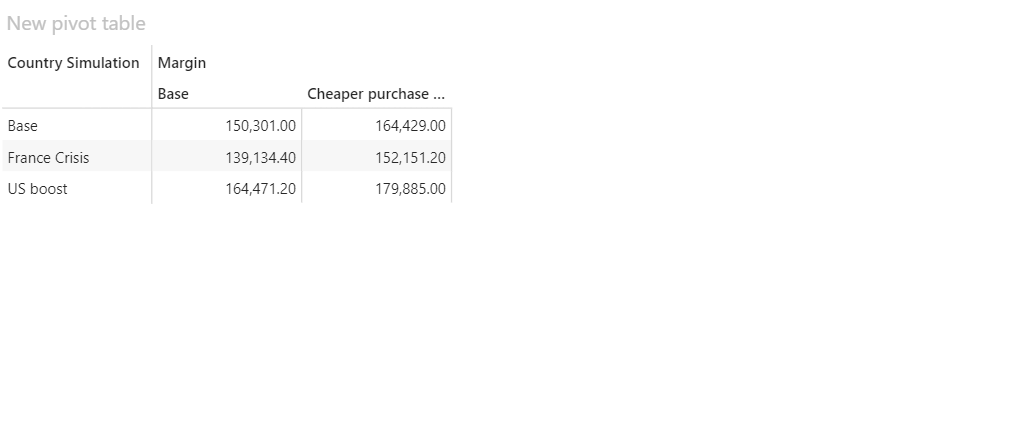

In [78]:
session.widget